<a href="https://colab.research.google.com/github/nabilaftzhr/Pacmann-Stats-For-Bussiness/blob/main/FP_Stats_For_Business_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT**

**STATISTICS FOR BUSSINESS**

PREDICTING HEART DISEASE USING LOGISTIC REGREESION

# **Project Background**

Penyakit jantung merupakan salah satu penyakit yang paling mematikan di dunia. Untuk menanggulangi hal tersebut, seorang menteri kesehatan di US ingin membuat suatu kebijakan preventif dengan membuat analisis dari data yang beliau punya untuk melihat faktor - faktor apa sajakah yang mempengaruhi penyakit jantung. Data ini merupakan data survei CDC tahun 2020 terhadap 400 ribu orang dewasa terkait status kesehatan mereka.


In [ ]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [ ]:
#Import the data
url = 'https://raw.githubusercontent.com/nabilaftzhr/Pacmann-Stats-For-Bussiness/main/heart_2020_cleaned.csv'
df = pd.read_csv(url,usecols=['HeartDisease','Smoking','Diabetic','AlcoholDrinking','Stroke','Sex','AgeCategory','Race','GenHealth'] )
df

,HeartDisease,Smoking,AlcoholDrinking,Stroke,Sex,AgeCategory,Race,Diabetic,GenHealth
0,No,Yes,No,No,Female,55-59,White,Yes,Very good
1,No,No,No,Yes,Female,80 or older,White,No,Very good
2,No,Yes,No,No,Male,65-69,White,Yes,Fair
3,No,No,No,No,Female,75-79,White,No,Good
4,No,No,No,No,Female,40-44,White,No,Very good
...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Male,60-64,Hispanic,Yes,Fair
319791,No,Yes,No,No,Male,35-39,Hispanic,No,Very good
319792,No,No,No,No,Female,45-49,Hispanic,No,Good
319793,No,No,No,No,Female,25-29,Hispanic,No,Good


In [ ]:
#Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   HeartDisease     319795 non-null  object
 1   Smoking          319795 non-null  object
 2   AlcoholDrinking  319795 non-null  object
 3   Stroke           319795 non-null  object
 4   Sex              319795 non-null  object
 5   AgeCategory      319795 non-null  object
 6   Race             319795 non-null  object
 7   Diabetic         319795 non-null  object
 8   GenHealth        319795 non-null  object
dtypes: object(9)
memory usage: 22.0+ MB


# **Data Cleaning and Preprocessing**

In [ ]:
# Untuk melihat apakah ada missing value
print("Missing values proportion:")
print(df.isnull().sum()/df.shape[0])
print("="*50)
# Untuk melihat apakah ada data yang terduplikasi
print("Duplicate data:")
print(df.duplicated().sum())

Missing values proportion:
HeartDisease       0.0
Smoking            0.0
AlcoholDrinking    0.0
Stroke             0.0
Sex                0.0
AgeCategory        0.0
Race               0.0
Diabetic           0.0
GenHealth          0.0
dtype: float64
Duplicate data:
308693


Karena ada duplikat data, maka kita akan menghilangkan data yang terduplikasi.

In [ ]:
df.drop_duplicates(inplace = True) # Untuk menghilangkan data yang terduplikasi.
print("Duplicated data:")
print(df.duplicated().sum())
print("="*50)

Duplicated data:
0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11102 entries, 0 to 319645
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HeartDisease     11102 non-null  object
 1   Smoking          11102 non-null  object
 2   AlcoholDrinking  11102 non-null  object
 3   Stroke           11102 non-null  object
 4   Sex              11102 non-null  object
 5   AgeCategory      11102 non-null  object
 6   Race             11102 non-null  object
 7   Diabetic         11102 non-null  object
 8   GenHealth        11102 non-null  object
dtypes: object(9)
memory usage: 867.3+ KB


# **Define the problems**

1.   Faktor - faktor apa sajakah yang mempengaruhi terjadinya penyakit jantung?
2. Apa faktor yang paling mempengaruhi dan tidak mempengaruhi penyakit jantung?
3. Apa yang dapat disimpulkan dari hasil analisis?



# **Exploratory Data Analysis**

In [ ]:
#Melihat distribusi responden yang mempunyai penyakit jantung (HeartDisease)
HD_Dist = df['HeartDisease'].value_counts()/len(df)
HD_Dist

No     0.679787
Yes    0.320213
Name: HeartDisease, dtype: float64

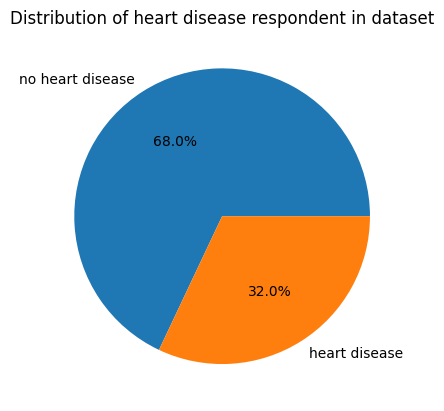

In [ ]:
#Membuat visualisasi distribusi penyakit jantung (HeartDisease) menggunakan pie chart
plt.pie(HD_Dist, labels = ['no heart disease', 'heart disease'],
       autopct = '%1.1f%%',)
plt.title("Distribution of heart disease respondent in dataset")
plt.show()

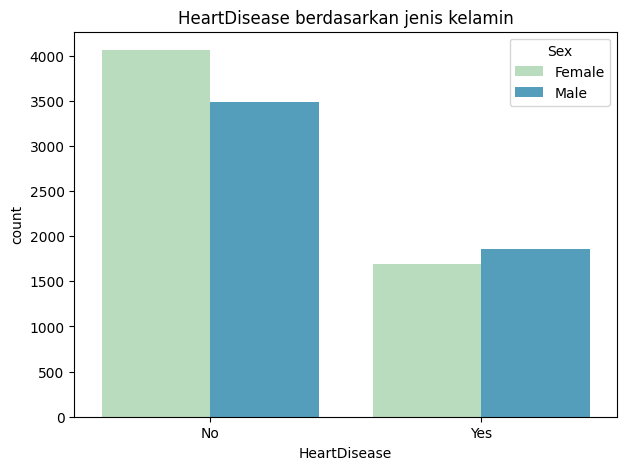

In [ ]:
#Melihat distribusi penyakit jantung (HeartDisease) dengan kategori jenis kelamin menggunakan diagram batang
plt.figure(figsize=(7,5))
plt.title('HeartDisease berdasarkan jenis kelamin');
sns.countplot(data=df, x='HeartDisease', hue = 'Sex', palette='GnBu');

Dari grafik di atas dapat dilihat bahwa penderita penyakit jantung (HeartDisease) lebih banyak diderita oleh jenis kelamin laki - laki dibandingkankan dengan perempuan.Apabila seseorang berjenis kelamin laki-laki, maka ia akan memiliki kecenderungan yang lebih tinggi untuk mengalami penyakit jantung dibandingkan seseorang yang berjenis kelamin perempuan.



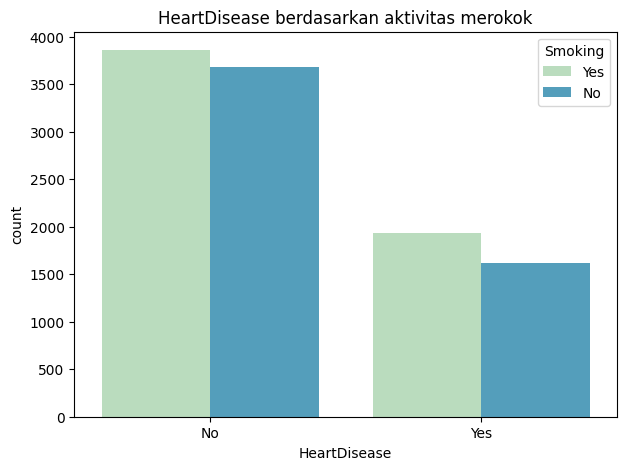

In [ ]:
#Melihat distribusi penyakit jantung (HeartDisease) dengan kebiasaan merokok menggunakan diagram batang
plt.figure(figsize=(7,5))
plt.title('HeartDisease berdasarkan aktivitas merokok');
sns.countplot(data=df, x='HeartDisease', hue = 'Smoking', palette='GnBu');

Grafik diatas menunjukkan penyakit jantung (HeartDisease) berdasarkan dari aktivitas merokok. Dapat dilihat bahwa orang yang memiliki kebiasaan merokok cenderung lebih tinggi terkena penyakit jantung dibandingkan dengan seseorang yang tidak merokok


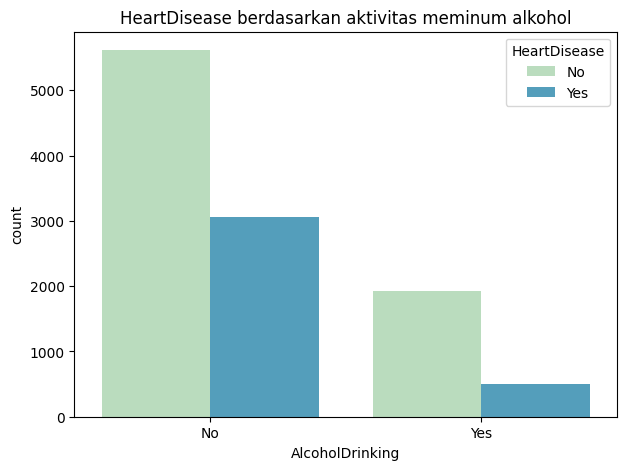

In [ ]:
#Melihat distribusi penyakit jantung (HeartDisease) dengan aktivitas meminum alkohol menggunakan diagram batang
plt.figure(figsize=(7,5))
plt.title('HeartDisease berdasarkan aktivitas meminum alkohol');
sns.countplot(data=df, x='AlcoholDrinking', hue = 'HeartDisease', palette='GnBu');

Grafik diatas menunjukkan pengaruh meminum alkohol terhadap penyakit jantung. Dapat dilihat ternyata yang tidak meminum alkohol memiliki presentase lebih tinggi terkena penyakit jantung dibandingkan seseorang yang meminum alkohol

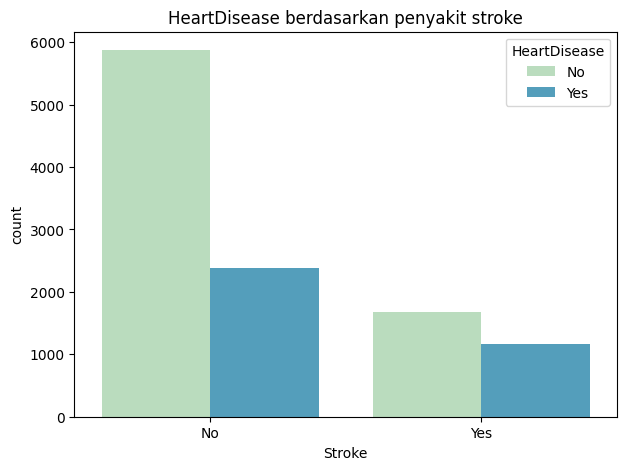

In [ ]:
#Melihat distribusi HeartDisease dengan penyakit stroke menggunakan diagram batang
plt.figure(figsize=(7,5))
plt.title('HeartDisease berdasarkan penyakit stroke');
sns.countplot(data=df, x='Stroke', hue = 'HeartDisease', palette='GnBu');

Grafik diatas menunjukkan pengaruh penyakit stroke terhadap penyakit jantung. Seseorang yang tidak memiliki stroke lebih tinggi probabilitasnya terkena penyakit jantung dibandingkan dengan seseorang yang memiliki penyakit stroke.

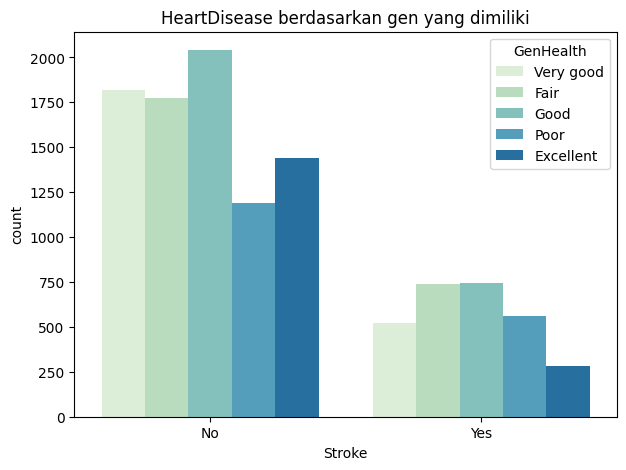

In [ ]:
#Melihat distribusi HeartDisease dengan gen yang dimiliki menggunakan diagram batang
plt.figure(figsize=(7,5))
plt.title('HeartDisease berdasarkan gen yang dimiliki');
sns.countplot(data=df, x='Stroke', hue = 'GenHealth', palette='GnBu');

Grafik diatas menunjukkan pengaruh gen yang dimiliki terhadap penyakit jantung. Seseorang yang memiliki gen relatif bagus lebih berpotensi terkena penyakit jantung dibandingkan seseorang yang memiliki gen sangat bagus, biasa, tidak bagus, dan sangat sangat bagus.

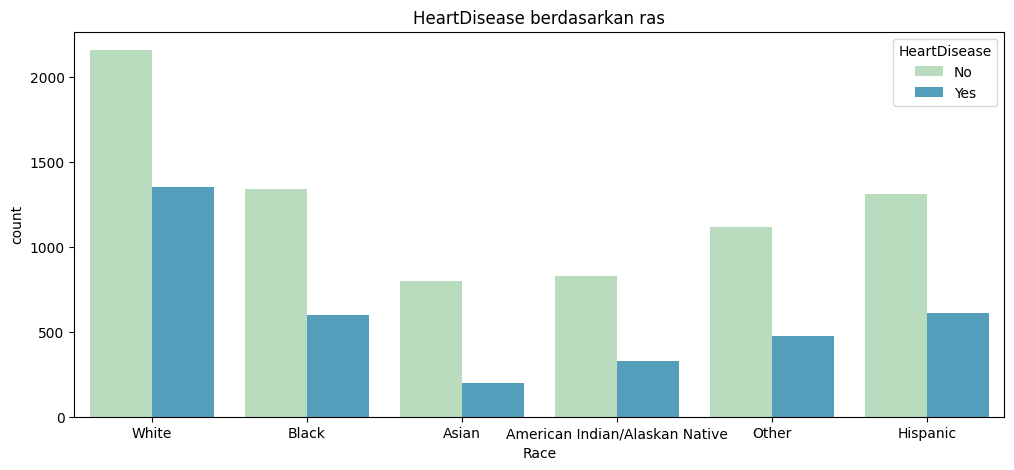

In [ ]:
#Melihat distribusi HeartDisease dengan kategori ras menggunakan diagram batang
plt.figure(figsize=(12,5))
plt.title('HeartDisease berdasarkan ras');
sns.countplot(data=df, x='Race', hue = 'HeartDisease', palette='GnBu');

Grafik diatas menunjukkan pengaruh ras yang dimiliki terhadap penyakit jantung. Seseorang yang memiliki ras kulit putih cenderung lebih tinggi berpotensi terkena penyakit jantung dibandingkan dengan seseorang dari ras kulit hitam, asia, american-india, hispanic dan ras lainnya.

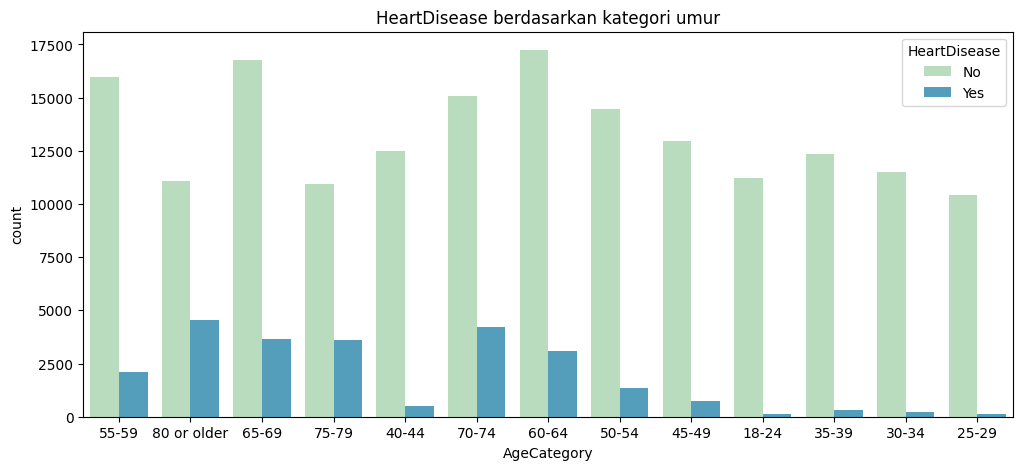

In [ ]:
#Melihat distribusi HeartDisease dengan kategori umur menggunakan diagram batang
plt.figure(figsize=(12,5))
plt.title('HeartDisease berdasarkan kategori usia');
sns.countplot(data=df, x='AgeCategory', hue = 'HeartDisease', palette='GnBu');

Grafik diatas menunjukkan pengaruh kategori usia terhadap penyakit jantung. Seseorang yang berusia 60 - 64  memiliki kemungkinan terjangkitnya penyakit jantung lebih tinggi dibandingkan dengan kategori usia lainnya.

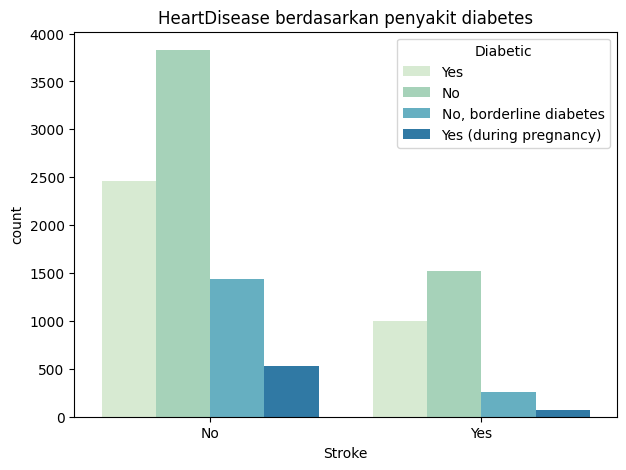

In [ ]:
#Melihat distribusi HeartDisease dengan penyakit diabetes menggunakan diagram batang
plt.figure(figsize=(7,5))
plt.title('HeartDisease berdasarkan penyakit diabetes');
sns.countplot(data=df, x='Stroke', hue = 'Diabetic', palette='GnBu');

Grafik diatas menunjukkan pengaruh penyakit diabetes terhadap penyakit jantung. Seseorang yang tidak memiliki penyakit diabetes lebih tinggi probabilitasnya terkena penyakit jantung dibandingkan dengan seseorang yang memiliki penyakit diabetes.

# **Performing Statistical Testing**

In [ ]:
#mengubah data kategorik menjadi numerik menggunakan label encoding

from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
for col in df:
    df[col]=label.fit_transform(df[col])
df

,HeartDisease,Smoking,AlcoholDrinking,Stroke,Sex,AgeCategory,Race,Diabetic,GenHealth
0,0,1,0,0,0,7,5,2,4
1,0,0,0,1,0,12,5,0,4
2,0,1,0,0,1,9,5,2,1
3,0,0,0,0,0,11,5,0,2
4,0,0,0,0,0,4,5,0,4
...,...,...,...,...,...,...,...,...,...
319588,0,0,0,1,1,6,3,2,2
319598,0,0,1,0,1,12,3,0,2
319601,1,1,1,0,1,8,3,0,1
319619,1,0,0,1,0,9,3,0,1


(9.5, -0.5)

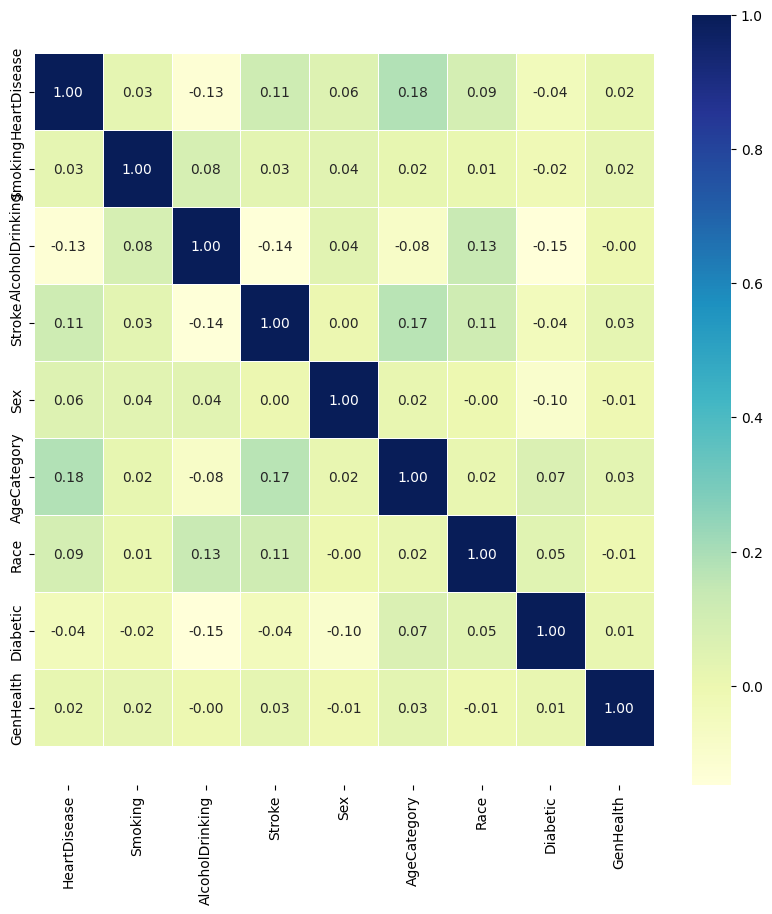

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with HeartDisease'}>

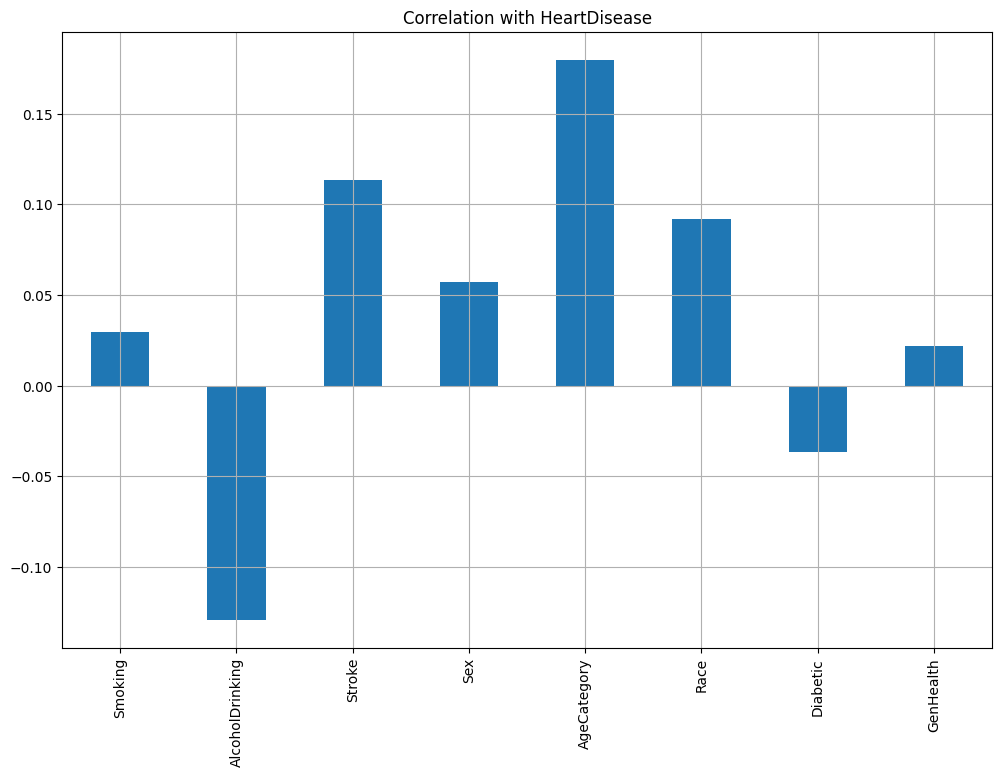

In [ ]:
df.drop('HeartDisease', axis=1).corrwith(df.HeartDisease).plot(kind='bar', grid=True, figsize=(12, 8),
                                                   title="Correlation with HeartDisease")

Berdasarkan kedua plot di atas, terlihat bahwa faktor aktivitas merokok, aktivitas meminum alkohol, penyakit diabetes dan gen tidak memiliki asosiasi yang kuat dengan kemungkinan seseorang terkena penyakit jantung.  


# **Building Regression Model**

In [ ]:
pip install scikit-learn

In [ ]:
# Import module for logistic regression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
from scipy.special import expit, logit

In [ ]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

In [ ]:
# Create Logit model object
logit_model = smf.logit("HeartDisease ~ AgeCategory + Sex + Stroke + Race", data = df)

# fit model
fit = logit_model.fit(disp=0)

# Extract the results (Coefficient and Standard Error) to DataFrame
results_default_coef = print_coef_std_err(fit)

In [ ]:
results_default_coef

,coef,std err
Intercept,-2.084190,0.068477
AgeCategory,0.109310,0.006376
Sex,0.245122,0.041732
Stroke,0.372606,0.046650
Race,0.108144,0.012593


In [ ]:
# Membagi data untuk prediksi
x=df[['AgeCategory','Stroke','Sex','Race']] #Membuat variabel dependen
y=df['HeartDisease'] #membuat variabel independen

In [ ]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=40)
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Prediksi menggunakan confusion matrix
predict=lr.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'], index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,2945,66
Actual Yes,1351,79


In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.69      0.98      0.81      3011
           1       0.54      0.06      0.10      1430

    accuracy                           0.68      4441
   macro avg       0.62      0.52      0.45      4441
weighted avg       0.64      0.68      0.58      4441



# **Interpret The Results**

Setelah dilakukan beberapa analisis statistik, kita dapat menjawab beberapa pertanyaan.

**1. Faktor - faktor apa sajakah yang mempengaruhi penyakit jantung?**

Berdasarkan dari hasil EDA, dapat dilihat bahwa faktor yang mempengaruhi penyakit jantung adalah kebiasaan penyakit stroke, jenis kelamin, kategori umur, dan ras.

Faktor penyakit stroke : apabila ada seseorang yang tidak memiliki stroke, maka ia lebih tinggi probabilitasnya terkena penyakit jantung dibandingkan dengan seseorang yang memiliki penyakit stroke.

Faktor jenis kelamin : apabila seseorang adalah laki - laki, Ia cenderung lebih tinggi berpotensi untuk terkena penyakit jantung dibandingkan dengan seseorang dengan jenis kelamin perempuan.

Faktor usia : apabila seseorang berusia 60 - 64 tahun atau lebih, maka ia memiliki kemungkinan terjangkitnya penyakit jantung lebih tinggi dibandingkan dengan kategori usia lainnya.

Faktor ras : apabila seseorang berasal dari ras kulit putih, maka ia cenderung lebih tinggi berpotensi terkena penyakit jantung dibandingkan dengan seseorang dari ras kulit hitam, asia, american-india, hispanic dan ras lainnya.

**2. Apa faktor yang paling mempengaruhi dan paling tidak mempengaruhi penyakit jantung?**

Berdasarkan hasil EDA yang telah dilakukan, faktor usia memiliki hubungan yang cukup kuat dengan probabilitas terkena penyakit jantung. Hal ini dibuktikan dengan nilai koefisien korelasi 0.15.

Sedangkan faktor aktivitas meminum alkohol memiliki hubungan tidak kuat dengan probabilitas seseorang terkena penyakit jantung, Hal ini dilihat dengan nilai koefisien korelasi -0.13.

**3. Apa yang dapat disimpulkan dari hasil analisis?**

Dari beberapa faktor yang berpengaruh terhadap penyakit jantung, terdapat beberapa faktor yang memiliki korelasi cukup tinggi yaitu usia dan penyakit stroke. 2 faktor ini dapat ditanggulangi dengan pola hidup sehat.

Pola hidup sehat yang dapat diterapkan dalam kehidupan sehari - hari antara lain :
- Aktif secara fisik
- Diet sehat
- Pemeriksaan rutin
- Hindari stress